In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Simulación de datos de clientes
np.random.seed(42)
num_clientes = 1000

# Variables ficticias
datos = pd.DataFrame({
    'edad': np.random.randint(18, 70, num_clientes),
    'meses_como_cliente': np.random.randint(1, 60, num_clientes),
    'uso_mensual': np.random.uniform(10, 200, num_clientes),
    'soporte_contactado': np.random.randint(0, 5, num_clientes),
    'factura_mensual': np.random.uniform(20, 100, num_clientes),
    'abandono': np.random.choice([0, 1], size=num_clientes, p=[0.8, 0.2]) # 20% de abandono
})

# Visualizar datos
datos.head()


,edad,meses_como_cliente,uso_mensual,soporte_contactado,factura_mensual,abandono
0,56,35,196.425374,3,55.905092,0
1,69,51,130.044570,0,32.722000,1
2,46,15,59.362680,3,34.415660,1
3,32,25,130.461084,3,27.858799,0
4,60,55,112.597222,0,84.281449,0


In [3]:
# Separar variables predictoras y objetivo
X = datos.drop(columns=['abandono'])
y = datos['abandono']

# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Entrenar un Random Forest para predecir abandono de clientes
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Precisión del Modelo: 0.78
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       157
           1       0.00      0.00      0.00        43

    accuracy                           0.78       200
   macro avg       0.39      0.49      0.44       200
weighted avg       0.61      0.78      0.69       200



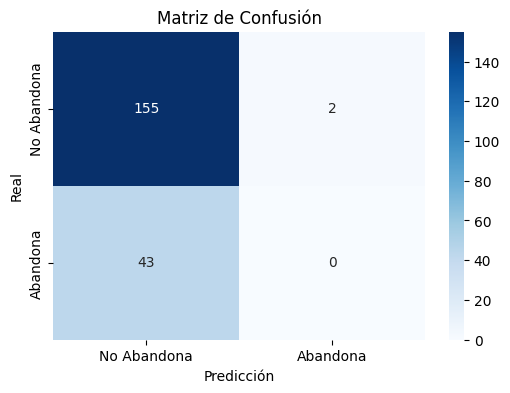

In [5]:
# Hacer predicciones
y_pred = modelo.predict(X_test)

# Calcular precisión y mostrar métricas
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del Modelo: {precision:.2f}")

# Reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['No Abandona', 'Abandona'], yticklabels=['No Abandona', 'Abandona'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()
